<a href="https://colab.research.google.com/github/ddesai-sjsu/Machine-Learning/blob/main/Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Review 
Recommendation Engine

## Installing required libraries

In [29]:
!pip install surprise

## Importing required libraries

In [30]:
import pandas as pd
from surprise import *
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

## Preprocessing Data

In [31]:
df=pd.read_json('https://amazon-reviews-ml.s3-us-west-2.amazonaws.com/json/train/dataset_en_train.json',lines=True)

In [32]:
df=df.sample(frac=0.05)
df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
100768,en_0609431,product_en_0293655,reviewer_en_0143025,3,I haven't used the product long enough to see ...,Packaging and delivery system of product needs...,en,beauty
139219,en_0892274,product_en_0055654,reviewer_en_0522857,4,Contrary to what weber says these do not do th...,Beyond that it is great.,en,lawn_and_garden
191725,en_0445610,product_en_0039402,reviewer_en_0984328,5,My granddaughter loves her baby doll.,Happy granddaughter!,en,toy
142225,en_0463324,product_en_0662006,reviewer_en_0985077,4,"Nice looking tires, fit fine. I have only used...",Fit great.,en,other
64505,en_0936941,product_en_0926034,reviewer_en_0582190,2,It fell apart in less then a month.,You get what you pay for,en,wireless
...,...,...,...,...,...,...,...,...
44622,en_0149266,product_en_0098276,reviewer_en_0521315,2,It came with the price sticker still on it. Th...,Not worth the money,en,kitchen
71212,en_0959264,product_en_0038118,reviewer_en_0741564,2,Broke after only several weeks of owning. Beau...,Beautiful but not,en,lawn_and_garden
150462,en_0462387,product_en_0587916,reviewer_en_0808820,4,I order two for comforter for my daughters. Th...,I would recommend a friend to buy one,en,home
124583,en_0956354,product_en_0116385,reviewer_en_0319595,4,Works great. The door to VHS player does not c...,Four Stars,en,other


In [33]:
df.columns

Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'language', 'product_category'],
      dtype='object')

In [34]:
df_new=df[['reviewer_id','product_id','stars']]

In [35]:
df_new.columns=['userID','itemID','rating']

## Converting Data to data type that surprise module can consume

In [36]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_new,reader)

In [37]:
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [38]:
trainset

In [39]:
acuuracy_table={}

# training the model on multiple types


1.  'BaselineOnly'
2.  'CoClustering'
3.  'KNNBaseline'
4.  'KNNBasic'
5.  'KNNWithMeans'
6.  'KNNWithZScore'
7.  'NMF': 
8.  'NormalPredictor': 
9.  'SVD':
10. 'SVDpp': 
11. 'SlopeOne':

In [40]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
acuuracy_table['KNNWithMeans']=accuracy_model

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4060


In [41]:
algo = NormalPredictor( )
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['NormalPredictor']=accuracy_model

RMSE: 1.8619


In [42]:
algo = BaselineOnly()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['BaselineOnly']=accuracy_model

Estimating biases using als...
RMSE: 1.4059


In [43]:
algo = KNNBasic()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['KNNBasic']=accuracy_model

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4060


In [44]:
algo = KNNWithZScore()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['KNNWithZScore']=accuracy_model

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4060


In [45]:
algo = KNNBaseline()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['KNNBaseline']=accuracy_model

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4059


In [46]:
algo = SVD()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['SVD']=accuracy_model

RMSE: 1.4059


In [47]:
algo =SVDpp()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['SVDpp']=accuracy_model

RMSE: 1.4058


In [48]:
algo =NMF()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['NMF']=accuracy_model

RMSE: 1.4060


In [49]:
algo =SlopeOne()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['SlopeOne']=accuracy_model

RMSE: 1.4060


In [50]:
algo =CoClustering()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['CoClustering']=accuracy_model

RMSE: 1.4060


In [51]:
algo.predict(uid='reviewer_en_0742686',iid='product_en_0095361').est

2.971

## Comparing all the model performance

In [52]:
acuuracy_table

{'BaselineOnly': 1.4059,
 'CoClustering': 1.406,
 'KNNBaseline': 1.4059,
 'KNNBasic': 1.406,
 'KNNWithMeans': 1.406,
 'KNNWithZScore': 1.406,
 'NMF': 1.406,
 'NormalPredictor': 1.8619,
 'SVD': 1.4059,
 'SVDpp': 1.4058,
 'SlopeOne': 1.406}

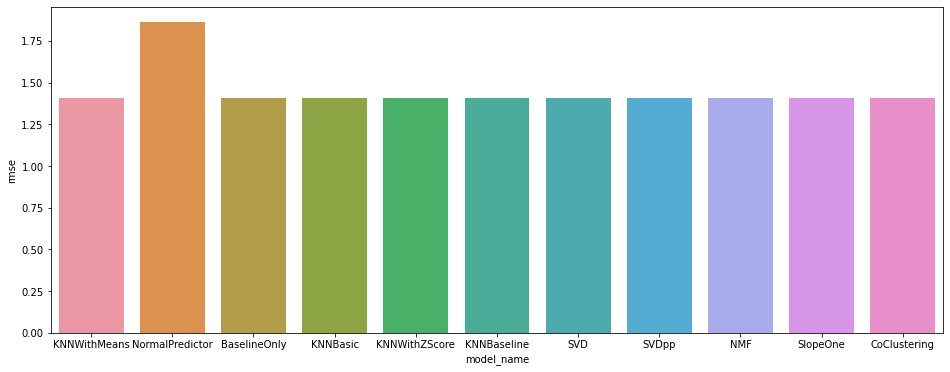

In [53]:
from matplotlib import pyplot as plt
import seaborn as sns
accuracy_x=pd.DataFrame.from_dict(acuuracy_table,orient='index').reset_index()
accuracy_x.columns=['model_name','rmse']

plt.figure(figsize=(16, 6))
ax = sns.barplot(data=accuracy_x, x='model_name', y='rmse')


We can observe that all the models perfomened in a similar way except Normal Predictor. It has a highest rmse others are almost in the similar rmse score

## Creating a function to use Models and then recommend  products

In this function we will be getting user id and scan through all the products and return top products that the user might like based on item based collorative filtering.

in this approach the liking of user will be kept into consideration as the model is based on user ratings

In [54]:
import heapq
def get_possible_rating(uid,recommend_number=5):
  product={}
  for i in df.product_id:
    product[i]=algo.predict(uid=uid,iid=i).est

  return heapq.nlargest(recommend_number, product.keys(), product.get) 

In [55]:
get_possible_rating('reviewer_en_0742686',12)

['product_en_0293655',
 'product_en_0055654',
 'product_en_0039402',
 'product_en_0662006',
 'product_en_0926034',
 'product_en_0003663',
 'product_en_0460761',
 'product_en_0693814',
 'product_en_0354658',
 'product_en_0011793',
 'product_en_0740074',
 'product_en_0123242']

In [56]:
df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
100768,en_0609431,product_en_0293655,reviewer_en_0143025,3,I haven't used the product long enough to see ...,Packaging and delivery system of product needs...,en,beauty
139219,en_0892274,product_en_0055654,reviewer_en_0522857,4,Contrary to what weber says these do not do th...,Beyond that it is great.,en,lawn_and_garden
191725,en_0445610,product_en_0039402,reviewer_en_0984328,5,My granddaughter loves her baby doll.,Happy granddaughter!,en,toy
142225,en_0463324,product_en_0662006,reviewer_en_0985077,4,"Nice looking tires, fit fine. I have only used...",Fit great.,en,other
64505,en_0936941,product_en_0926034,reviewer_en_0582190,2,It fell apart in less then a month.,You get what you pay for,en,wireless
...,...,...,...,...,...,...,...,...
44622,en_0149266,product_en_0098276,reviewer_en_0521315,2,It came with the price sticker still on it. Th...,Not worth the money,en,kitchen
71212,en_0959264,product_en_0038118,reviewer_en_0741564,2,Broke after only several weeks of owning. Beau...,Beautiful but not,en,lawn_and_garden
150462,en_0462387,product_en_0587916,reviewer_en_0808820,4,I order two for comforter for my daughters. Th...,I would recommend a friend to buy one,en,home
124583,en_0956354,product_en_0116385,reviewer_en_0319595,4,Works great. The door to VHS player does not c...,Four Stars,en,other


In [65]:
df=df_new

df

,userID,itemID,rating
100768,reviewer_en_0143025,product_en_0293655,3
139219,reviewer_en_0522857,product_en_0055654,4
191725,reviewer_en_0984328,product_en_0039402,5
142225,reviewer_en_0985077,product_en_0662006,4
64505,reviewer_en_0582190,product_en_0926034,2
...,...,...,...
44622,reviewer_en_0521315,product_en_0098276,2
71212,reviewer_en_0741564,product_en_0038118,2
150462,reviewer_en_0808820,product_en_0587916,4
124583,reviewer_en_0319595,product_en_0116385,4


## Model Based Collobartive filtering


Preprocessing for model based collaborative filtering.


In [58]:
ratings_matrix = df.pivot_table(values='rating', index='userID', columns='itemID', fill_value=0)


In [59]:
X = ratings_matrix.T

In [60]:
X1 = X

In [61]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(9953, 10)

In [62]:
import numpy as np
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(9953, 9953)

In [86]:
ix=random.randrange(0, len(df))
df['itemID'].values[ix]
product_names = list(X.index)

In [88]:
correlation_product_ID = correlation_matrix[product_ID]

In [90]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:5]

['product_en_0000543',
 'product_en_0000660',
 'product_en_0001336',
 'product_en_0002690',
 'product_en_0003442']